In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
data_file_path = 'C:/Users/ulas/Desktop/MLOps/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [34]:
df = pd.read_csv(data_file_path)
df.shape

(7043, 21)

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [37]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [38]:
# Binary categorical columns (2 unique values)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

# Map Yes/No and Male/Female to 0/1
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})


df.describe()

C:\Users\ulas\AppData\Local\Temp\ipykernel_37068\461992277.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000


In [39]:
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]


df = pd.get_dummies(df, columns = multi_cat_cols, drop_first=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   object 
 10  Churn                                  7043 non-null   int64  
 11  Mult

In [41]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

df = df.drop('customerID', axis= 1)

In [42]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype('int64')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [44]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending = False)

not_corr_columns = churn_corr[(churn_corr < 0.1 ) & (churn_corr > -0.1)].index
not_corr_columns = not_corr_columns.to_numpy()
not_corr_columns.reshape(1,9)

not_corr_columns



array(['StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes',
       'PhoneService', 'gender', 'MultipleLines_No phone service',
       'DeviceProtection_Yes', 'OnlineBackup_Yes',
       'PaymentMethod_Mailed check'], dtype=object)

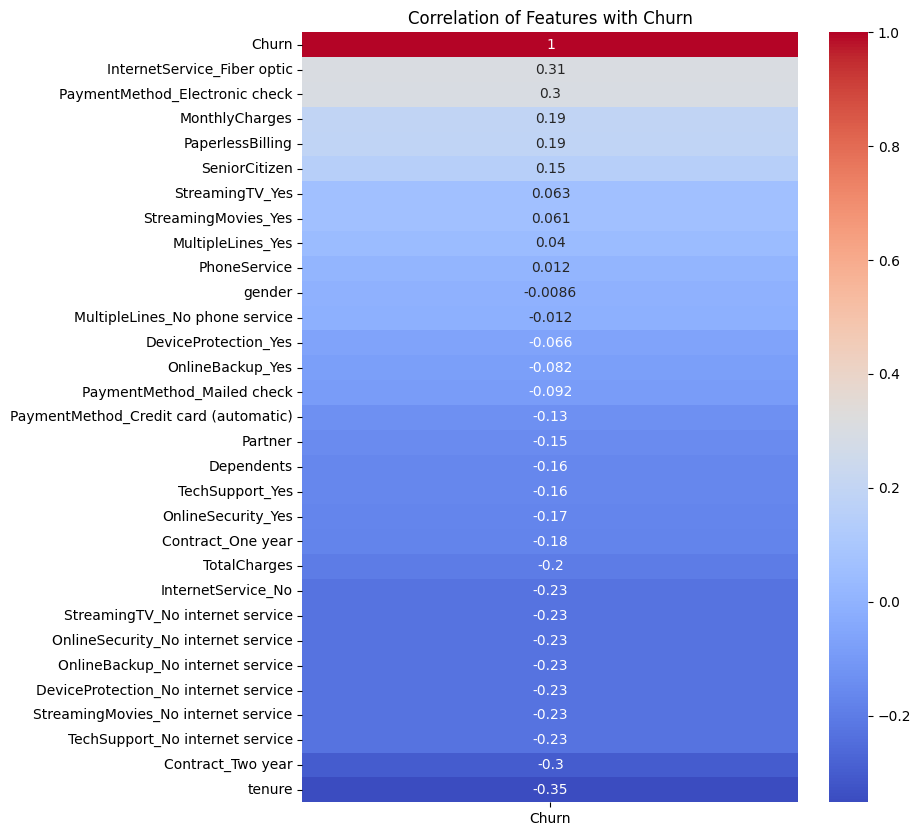

In [45]:
# Plot as heatmap
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)
plt.figure(figsize = (8,10))
sns.heatmap(churn_corr, annot = True, cmap= 'coolwarm')
plt.title('Correlation of Features with Churn')
plt.show()

In [46]:
df.drop(not_corr_columns,axis = 1 ,inplace=True)

In [47]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [48]:
# We need to collapse redundant columns before running VIF
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

drop_cols = [col for col in df.columns if 'No internet service' in col]

df.drop(drop_cols, axis = 1, inplace=True)

In [49]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,No_internet_service
0,0,1,0,1,1,29.85,29.85,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,0,0,1,0,1,0,0,0,0
2,0,0,0,2,1,53.85,108.15,1,0,0,1,0,0,0,0,0,0
3,0,0,0,45,0,42.30,1840.75,0,0,0,1,1,1,0,0,0,0
4,0,0,0,2,1,70.70,151.65,1,1,0,0,0,0,0,0,1,0


In [50]:
X = df.drop(columns=['Churn'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PaperlessBilling                       7043 non-null   int64  
 5   MonthlyCharges                         7043 non-null   float64
 6   TotalCharges                           7032 non-null   float64
 7   InternetService_Fiber optic            7043 non-null   int64  
 8   InternetService_No                     7043 non-null   int64  
 9   OnlineSecurity_Yes                     7043 non-null   int64  
 10  TechSupport_Yes                        7043 non-null   int64  
 11  Cont

In [51]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                                  feature        VIF
15                    No_internet_service        inf
8                      InternetService_No        inf
5                          MonthlyCharges  17.333796
3                                  tenure  16.355575
6                            TotalCharges  14.045224
7             InternetService_Fiber optic   6.327006
12                      Contract_Two year   3.407178
4                        PaperlessBilling   2.894926
1                                 Partner   2.820816
10                        TechSupport_Yes   2.266934
14         PaymentMethod_Electronic check   2.196603
9                      OnlineSecurity_Yes   2.070126
11                      Contract_One year   2.031205
2                              Dependents   1.958523
13  PaymentMethod_Credit card (automatic)   1.542525
0                           SeniorCitizen   1.367916


c:\Users\ulas\Desktop\MLOps\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



In [52]:
# We have a class imbalance problem
# Given your imbalance (27% churners), class weighting + threshold tuning is probably enough — no need for aggressive oversampling yet.
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rf = RandomForestClassifier(
    n_estimators = 300,
    class_weight = 'balanced',
    random_state = 42,
    n_jobs = -1
)

rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]

y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits = 3))



              precision    recall  f1-score   support

           0      0.879     0.757     0.813      1035
           1      0.514     0.711     0.596       374

    accuracy                          0.744      1409
   macro avg      0.696     0.734     0.705      1409
weighted avg      0.782     0.744     0.756      1409



In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40,0.45,0.50]:
    preds = (proba >= thresh).astype(int)
    rec = recall_score(y_test, preds, pos_label = 1)
    prec = precision_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.498   0.773   0.606   
0.3     0.514   0.711   0.596   
0.35    0.540   0.671   0.598   
0.4     0.556   0.610   0.582   
0.45    0.595   0.543   0.568   
0.5     0.627   0.503   0.558   


### LightGBM classifier

In [56]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time


lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

start = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start
print(f"⏱ Training time: {train_time:.2f} seconds")


proba = lgbm.predict_proba(X_test)[:, 1]
pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, pred, digits= 3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 0.47 seconds
              precision    recall  f1-score   support

           0      0.914     0.681     0.781      1035
           1      0.483     0.824     0.609       374

    accuracy                          0.719      1409
   macro avg      0.699     0.752     0.695      1409
weighted avg      0.800     0.719     0.735      1409



In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.460   0.834   0.593   
0.3     0.483   0.824   0.609   
0.35    0.503   0.797   0.616   
0.4     0.523   0.773   0.624   
0.45    0.544   0.757   0.633   
0.5     0.546   0.725   0.623   


In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.31 seconds
⏱ Prediction time: 0.0053 seconds
              precision    recall  f1-score   support

           0      0.912     0.674     0.776      1035
           1      0.477     0.821     0.603       374

    accuracy                          0.713      1409
   macro avg      0.695     0.748     0.689      1409
weighted avg      0.797     0.713     0.730      1409



In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.457   0.842   0.593   
0.3     0.477   0.821   0.603   
0.35    0.496   0.791   0.610   
0.4     0.512   0.762   0.612   
0.45    0.527   0.730   0.612   
0.5     0.540   0.698   0.609   


In [60]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }

    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred =(proba >= THRESHOLD).astype(int)

    return recall_score(y_test, y_pred, pos_label = 1)


study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 50)


print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2026-02-12 14:20:48,786] A new study created in memory with name: no-name-b68208f8-9011-43a5-aea7-19ea90c8b600
[I 2026-02-12 14:20:49,169] Trial 0 finished with value: 0.8796791443850267 and parameters: {'n_estimators': 477, 'learning_rate': 0.021734110083069462, 'max_depth': 10, 'subsample': 0.9851958858346743, 'colsample_bytree': 0.9213827338450921, 'min_child_weight': 9, 'gamma': 0.2999787483900035, 'reg_alpha': 3.8636463237979726, 'reg_lambda': 2.898878333491173}. Best is trial 0 with value: 0.8796791443850267.
[I 2026-02-12 14:20:49,528] Trial 1 finished with value: 0.9010695187165776 and parameters: {'n_estimators': 646, 'learning_rate': 0.012389461711066623, 'max_depth': 8, 'subsample': 0.5551842726555354, 'colsample_bytree': 0.6117588161105444, 'min_child_weight': 5, 'gamma': 3.6685446161513964, 'reg_alpha': 2.93281619736881, 'reg_lambda': 1.9489564047625678}. Best is trial 1 with value: 0.9010695187165776.
[I 2026-02-12 14:20:49,730] Trial 2 finished with value: 0.903743315

Best Params: {'n_estimators': 559, 'learning_rate': 0.021665283472112162, 'max_depth': 10, 'subsample': 0.9973850192452843, 'colsample_bytree': 0.5772476945012285, 'min_child_weight': 1, 'gamma': 4.751153423977226, 'reg_alpha': 2.6731174312879165, 'reg_lambda': 2.644277230717946}
Best Recall: 0.9090909090909091


In [61]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

best_params = study.best_params
best_params.update({
    'random_state' : 42,
    'n_jobs' : -1,
    'scale_pos_weight' : scale_pos_weight,
    'eval_metric' : 'logloss'
})


xgb = XGBClassifier(**best_params)

start = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")


print(classification_report(y_test, y_pred, digits=3))



⏱ Training time: 0.20 seconds
⏱ Prediction time: 0.0041 seconds
              precision    recall  f1-score   support

           0      0.946     0.571     0.712      1035
           1      0.434     0.909     0.587       374

    accuracy                          0.661      1409
   macro avg      0.690     0.740     0.650      1409
weighted avg      0.810     0.661     0.679      1409



In [62]:
import optuna.visualization as vis

plt.figure(figsize=(10,10))
# Optimization history
vis.plot_optimization_history(study).show()
# Parameter importance
vis.plot_param_importances(study).show()
# Parallel coordinate plot
vis.plot_parallel_coordinate(study).show()
# Slice plot
vis.plot_slice(study).show()

<Figure size 1000x1000 with 0 Axes>

In [65]:
import mlflow
import mlflow.sklearn  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

# Force MLflow to always use the project root's mlruns folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file//C:/Users/ulas/Desktop/MLOps/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # Calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    # Log parameters
    mlflow.log_params(best_params)

    # Training timer
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    # Prediction
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

2026/02/12 14:35:47 INFO mlflow.tracking.fluent: Experiment with name 'Telco Churn - XGBoost' does not exist. Creating a new experiment.
2026/02/12 14:35:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0      0.946     0.571     0.712      1035
           1      0.434     0.909     0.587       374

    accuracy                          0.661      1409
   macro avg      0.690     0.740     0.650      1409
weighted avg      0.810     0.661     0.679      1409

